### **The code of Q4** 
### **YI FAN**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 4(a)

In [4]:
# Estimate the means and variances-covariance matrix of the three real returns.
# Calculate real returns
# Load the data
data=pd.read_excel('Assignment1data.xlsx') # Replace with actual data loading method if needed
returns = data[['Stocks', 'Bonds', 'Bills']] / 100  # Convert returns to decimals
inflation = data['Inflation'] / 100  # Convert inflation to decimal

# Step 1: Calculate real returns
real_returns = (1 + returns).div(1 + inflation, axis=0) - 1
real_returns = real_returns*100 # Convert real returns to percentage
mean_real_returns = real_returns.mean().values  
print("The average vector of real returns is",mean_real_returns)
cov_matrix_real_returns = real_returns.cov().values
print("The covariance matrix of real returns is",cov_matrix_real_returns)
# Sample estimates of the mean and variance-covariance matrix
mu1 = mean_real_returns[0]
mu2 = mean_real_returns[1]
mu3 = mean_real_returns[2]
sigma1 = cov_matrix_real_returns[0, 0]
sigma2 = cov_matrix_real_returns[1, 1]
sigma3 = cov_matrix_real_returns[2, 2]
M1 = real_returns['Stocks'] - mu1
M2 = real_returns['Bonds'] - mu2
M3 = real_returns['Bills'] - mu3
M4 = M1**2 - sigma1
M5 = M2**2 - sigma2
M6 = M3**2 - sigma3
T = len(real_returns)
moment=np.array([M1, M2, M3, M4, M5, M6]).T
print(moment.shape)
moment_means = np.mean(moment, axis=0)
print(moment_means, moment_means.shape)
# Gradient matrix
G = [
    [-1, 0, 0, -2 * moment_means[0], 0, 0],
    [0, -1, 0, 0, -2 * moment_means[1], 0],
    [0, 0, -1, 0, 0, -2 * moment_means[2]],
    [0, 0, 0, -1, 0, 0],
    [0, 0, 0, 0, -1, 0],
    [0, 0, 0, 0, 0, -1]
]
G = np.array(G)
cov_matrix_moments = np.cov(moment, rowvar=False)
W = np.linalg.inv(cov_matrix_moments)
# GMM Variance Matrix: Var(theta) = (G.T W G)^(-1)
gmm_variance_matrix = np.linalg.inv(G.T @ W @ G)/T
print("GMM Variance Matrix:", gmm_variance_matrix)
print("standard errors of mu1, mu2, mu3, sigma1, sigma2, sigma3 are",np.sqrt(np.diag(gmm_variance_matrix)))


The average vector of real returns is [0.68407658 0.2082086  0.0267017 ]
The covariance matrix of real returns is [[28.63206389  1.53932072  0.2137609 ]
 [ 1.53932072  6.86108864  0.42281249]
 [ 0.2137609   0.42281249  0.26128283]]
(1176, 6)
[ 1.81260902e-17  1.20840601e-17 -1.66155827e-17 -2.43469931e-02
 -5.83425904e-03 -2.22179277e-04] (6,)
GMM Variance Matrix: [[ 2.43469931e-02  1.30894619e-03  1.81769477e-04  3.11161639e-02
  -3.45931267e-03 -3.52396094e-04]
 [ 1.30894619e-03  5.83425904e-03  3.59534434e-04  7.86903296e-03
   7.59138632e-03 -1.46337296e-04]
 [ 1.81769477e-04  3.59534434e-04  2.22179277e-04  3.10946259e-03
   5.07588589e-04 -1.65097457e-04]
 [ 3.11161639e-02  7.86903296e-03  3.10946259e-03  6.79533073e+00
   6.77516377e-02  5.65364552e-03]
 [-3.45931267e-03  7.59138632e-03  5.07588589e-04  6.77516377e-02
   2.34178546e-01  1.63717247e-03]
 [-3.52396094e-04 -1.46337296e-04 -1.65097457e-04  5.65364552e-03
   1.63717247e-03  9.79955847e-04]]
standard errors of mu1, mu

## 4(b)

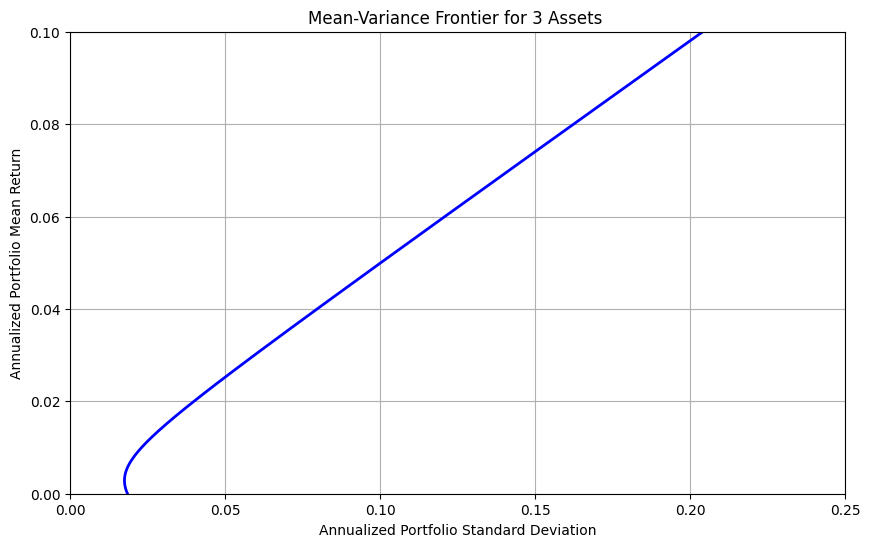

Estimated Means (Annualized):
Stocks: 0.082089
Bonds: 0.024985
Bills: 0.003204


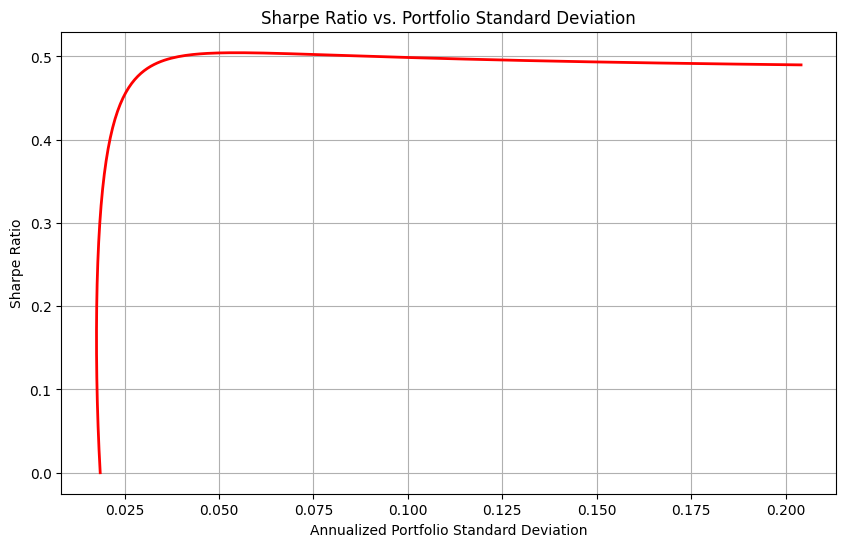

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data=pd.read_excel('Assignment1data.xlsx') # Replace with actual data loading method if needed
returns = data[['Stocks', 'Bonds', 'Bills']] / 100  # Convert returns to decimals
inflation = data['Inflation'] / 100  # Convert inflation to decimal
real_returns = (1 + returns).div(1 + inflation, axis=0) - 1
# Step 1: Calculate annulized real returns
annualized_returns = real_returns * 12 # Annualized returns
annualized_mu = real_returns.mean() * 12  # Annualized mean returns
annualized_cov = real_returns.cov() * 12  # Annualized covariance matrix

# Step 3: Define target returns for the frontier
target_means = np.linspace(0, 0.10, 200)  # Target portfolio returns from 0% to 10%
num_portfolios = len(target_means)
portfolio_means = np.zeros(num_portfolios)
portfolio_stddevs = np.zeros(num_portfolios)
optimal_weights = np.zeros((num_portfolios, len(annualized_mu)))
# Step 4: Construct the efficient frontier
inv_cov = np.linalg.inv(annualized_cov)  # Inverse of covariance matrix
ones_vec = np.ones(3)
A = ones_vec.T @ inv_cov @ ones_vec
B = ones_vec.T @ inv_cov @ annualized_mu.values
C = annualized_mu.values.T @ inv_cov @ annualized_mu.values

for i in range(num_portfolios):
    # Set the target return
    target_return = target_means[i]
    
    # Calculate weights that minimize variance for the given return (using Lagrange multipliers)
    lambda_ = (C - B * target_return) / (A * C - B**2)
    gamma = (A * target_return - B) / (A * C - B**2)
    w = lambda_ * (inv_cov @ ones_vec) + gamma * (inv_cov @ annualized_mu.values)
    optimal_weights[i] = w
    # Calculate portfolio mean and standard deviation
    portfolio_means[i] = w.T @ annualized_mu.values
    portfolio_stddevs[i] = np.sqrt(w.T @ annualized_cov @ w)

# Step 5: Plot the mean-variance frontier
plt.figure(figsize=(10, 6))
plt.plot(portfolio_stddevs, portfolio_means, 'b-', linewidth=2)
plt.xlabel('Annualized Portfolio Standard Deviation')
plt.ylabel('Annualized Portfolio Mean Return')
plt.title('Mean-Variance Frontier for 3 Assets ')
plt.xlim(0, 0.25)
plt.ylim(0, 0.10)
plt.grid(True)
plt.show()

# Display estimated means for reference
print('Estimated Means (Annualized):')
print(f'Stocks: {annualized_mu["Stocks"]:.6f}')
print(f'Bonds: {annualized_mu["Bonds"]:.6f}')
print(f'Bills: {annualized_mu["Bills"]:.6f}')
# Step 6: Calculate Sharpe Ratios for each portfolio
sharpe_ratios = portfolio_means / portfolio_stddevs

# Plot the Sharpe Ratio against the standard deviation
plt.figure(figsize=(10, 6))
plt.plot(portfolio_stddevs, sharpe_ratios, 'r-', linewidth=2)
plt.xlabel('Annualized Portfolio Standard Deviation')
plt.ylabel('Sharpe Ratio')
plt.title('Sharpe Ratio vs. Portfolio Standard Deviation')
plt.grid(True)
plt.show()

## 4(c)

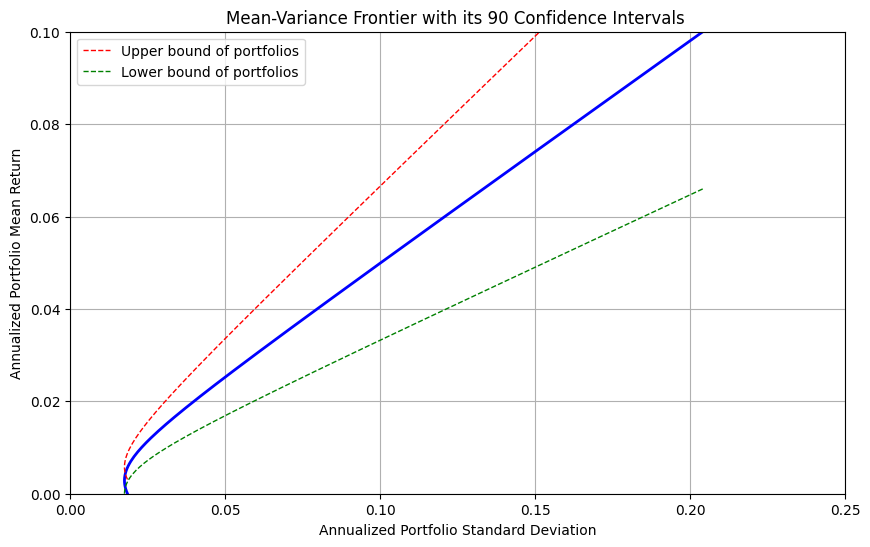

In [6]:
# Compute the covariance matrix of moment conditions
R=annualized_returns.mean().values
G1 = real_returns['Stocks'] * 12 - R[0]
G2 = real_returns['Bonds'] * 12 - R[1]
G3 = real_returns['Bills'] * 12 - R[2]
G_T= np.array([G1, G2, G3]).T
V_theta =  np.cov(G_T, rowvar=False)/T 
grad_R_list=[]
# Calculate gradients for each weight vector
for i in range(num_portfolios):
    w = optimal_weights[i]
    grad_R= w.T
    grad_R_list.append(grad_R)

# Convert lists to numpy arrays for easier handling
grad_R_array = np.array(grad_R_list)

SE=[] #Define a list to store standard errors

# Calculate standard errors of portfolio returns
for i in range(num_portfolios):
    SE_port= np.sqrt(grad_R_array[i] @ V_theta @ grad_R_array[i].T)
    SE.append(SE_port)

Upper_bound_portfolios=portfolio_means+1.65*np.array(SE)
Lower_bound_portfolios=portfolio_means-1.65*np.array(SE)

plt.figure(figsize=(10, 6))
plt.plot(portfolio_stddevs, portfolio_means, 'b-', linewidth=2)
plt.plot(portfolio_stddevs, Upper_bound_portfolios, 'r--', linewidth=1, label='Upper bound of portfolios')
plt.plot(portfolio_stddevs, Lower_bound_portfolios, 'g--', linewidth=1, label='Lower bound of portfolios')
plt.xlabel('Annualized Portfolio Standard Deviation')
plt.ylabel('Annualized Portfolio Mean Return')
plt.title('Mean-Variance Frontier with its 90 Confidence Intervals ')
plt.legend()
plt.xlim(0, 0.25)
plt.ylim(0, 0.10)
plt.grid(True)
plt.show()